In [3]:
from pandas_datareader import data
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
import pandas as pd
from datetime import date, timedelta, datetime
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import seaborn as sns

In [4]:
start_date = datetime.strptime('2018-08-31', "%Y-%m-%d")
end_date = datetime.strptime('2023-08-21', "%Y-%m-%d")

df = yf.download("AMAT", start=start_date, end=end_date)

df.reset_index(inplace=True)

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['50_day_ma'] = df['Close'].rolling(window=50).mean()
df['1000_day_ma'] = df['Close'].rolling(window=1000).mean()
df['10_day_vol_avg'] = df['Volume'].rolling(window=10).mean()
df['200_day_vol_avg'] = df['Volume'].rolling(window=200).mean()

df_news = pd.read_csv('newsdata.csv')

df = df[['Date', 'Close']]

df.to_csv('AMAToutput.csv', index=False)

df['1'] = df_news['1']
df['2'] = df_news['2']
df['3'] = df_news['3']
df['4'] = df_news['4']
df['5'] = df_news['5']
df['6'] = df_news['6']
df['7'] = df_news['7']
df['8'] = df_news['8']
df['9'] = df_news['9']

print(df)
print(df_news)

[*********************100%%**********************]  1 of 1 completed
           Date       Close  1  2   3   4   5   6   7   8  9
0    2018-08-31   43.020000  0  0   0   0   3   1   0   0  0
1    2018-09-04   42.619999  0  0   0   0   0   0   0   0  0
2    2018-09-05   42.500000  0  0   0   0   0   0   5   0  0
3    2018-09-06   40.270000  0  0   1   1   3   4   0   1  0
4    2018-09-07   39.849998  0  0   0   0  24   3  13   2  0
...         ...         ... .. ..  ..  ..  ..  ..  ..  .. ..
1244 2023-08-14  141.889999  0  6  10  15  53  16  34  11  1
1245 2023-08-15  140.080002  2  4   5   8  18   4  21  10  5
1246 2023-08-16  138.250000  0  4   0  20  46   0  34  15  1
1247 2023-08-17  137.589996  0  6   0   5  19  23  12  19  3
1248 2023-08-18  142.660004  0  1   0   0   1   0   1   2  0

[1249 rows x 11 columns]
            Date  1  2  3  4   5  6   7   8  9
0     2018-08-31  0  0  0  0   3  1   0   0  0
1     2018-09-01  0  0  0  0   0  0   0   0  0
2     2018-09-02  0  0  0  0   0

<ipython-input-4-8149ee498727>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['1'] = df_news['1']
<ipython-input-4-8149ee498727>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2'] = df_news['2']
<ipython-input-4-8149ee498727>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [5]:
df.set_index('Date', inplace=True)

df.dropna(inplace=True)

train_df = df.sort_values(by=['Date']).copy()

#FEATURES = ['Close', '50_day_ma', '200_day_ma']
FEATURES = ['Close', '1', '2', '3', '4', '5', '6', '7', '8', '9']

print('FEATURE LIST')
print([f for f in FEATURES])

print(df)

data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

data_filtered_ext.tail()

nrows = data_filtered.shape[0]

np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

FEATURE LIST
['Close', '1', '2', '3', '4', '5', '6', '7', '8', '9']
                 Close  1  2   3   4   5   6   7   8  9
Date                                                   
2018-08-31   43.020000  0  0   0   0   3   1   0   0  0
2018-09-04   42.619999  0  0   0   0   0   0   0   0  0
2018-09-05   42.500000  0  0   0   0   0   0   5   0  0
2018-09-06   40.270000  0  0   1   1   3   4   0   1  0
2018-09-07   39.849998  0  0   0   0  24   3  13   2  0
...                ... .. ..  ..  ..  ..  ..  ..  .. ..
2023-08-14  141.889999  0  6  10  15  53  16  34  11  1
2023-08-15  140.080002  2  4   5   8  18   4  21  10  5
2023-08-16  138.250000  0  4   0  20  46   0  34  15  1
2023-08-17  137.589996  0  6   0   5  19  23  12  19  3
2023-08-18  142.660004  0  1   0   0   1   0   1   2  0

[1249 rows x 10 columns]
(1249, 10)


In [6]:
sequence_length = 100

index_Close = data_filtered.columns.get_loc("Close")

train_data_len = math.ceil(np_data_scaled.shape[0] * 0.6)

train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

In [7]:
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    print(index_Close)
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:])
        y.append(data[i, index_Close])

    x = np.array(x)
    y = np.array(y)
    return x, y

x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

model = Sequential()

n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

0
0
(650, 100, 10) (650,)
(499, 100, 10) (499,)
0.07035722756117527
0.07035722756117527
1000 100 10


In [8]:
model.compile(optimizer='adam', loss='mse')

epochs = 30
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience = 3, verbose=1)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[])

Epoch 1/30
41/41 [==============================] - 15s 121ms/step - loss: 0.0264 - val_loss: 0.0205
Epoch 2/30
41/41 [==============================] - 4s 102ms/step - loss: 8.5505e-04 - val_loss: 0.0047
Epoch 3/30
41/41 [==============================] - 4s 105ms/step - loss: 5.9192e-04 - val_loss: 0.0040
Epoch 4/30
41/41 [==============================] - 4s 102ms/step - loss: 7.1036e-04 - val_loss: 0.0019
Epoch 5/30
41/41 [==============================] - 4s 110ms/step - loss: 6.6268e-04 - val_loss: 0.0029
Epoch 6/30
41/41 [==============================] - 4s 102ms/step - loss: 7.6118e-04 - val_loss: 0.0019
Epoch 7/30
41/41 [==============================] - 4s 103ms/step - loss: 5.5864e-04 - val_loss: 0.0077
Epoch 8/30
41/41 [==============================] - 4s 107ms/step - loss: 7.2561e-04 - val_loss: 0.0021
Epoch 9/30
41/41 [==============================] - 4s 105ms/step - loss: 6.3905e-04 - val_loss: 0.0019
Epoch 10/30
41/41 [==============================] - 4s 105ms/step 

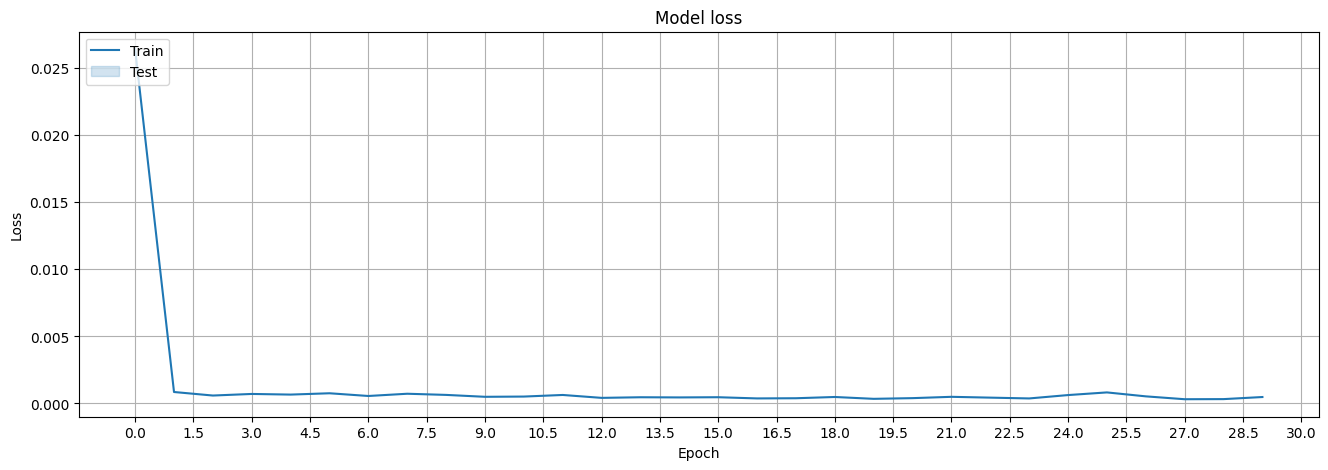

In [9]:
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

16/16 [==============================] - 1s 38ms/step
Accuracy: 0.488 %
Precision: 0.488 %
Recall: 0.49 %
F Score: 0.489 %


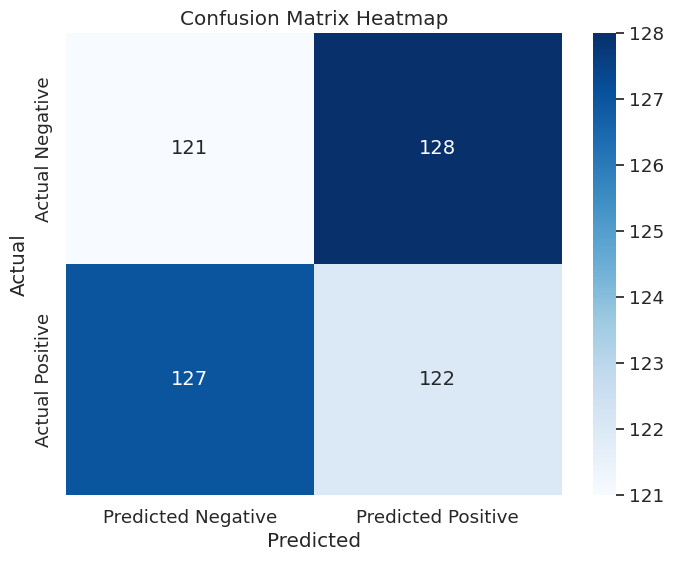

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_scaled = model.predict(x_test)

y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

y_pred_bin = []
y_test_bin = []

for i in range(1, len(y_pred)):
    if (y_pred[i] > y_pred[i-1]):
      y_pred_bin.append(1)
    else:
      y_pred_bin.append(-1)

for i in range(1, len(y_test_unscaled)):
    if (y_test_unscaled[i] > y_test_unscaled[i-1]):
      y_test_bin.append(1)
    else:
      y_test_bin.append(-1)

count_up = 0
count_down = 0
total_up = 0
total_down = 0
for i in range(len(y_pred_bin)):
  if (y_pred_bin[i] == y_test_bin[i]):
    if (y_pred_bin[i] == 1):
      count_up += 1
    else:
      count_down += 1
  if (y_test_bin[i] == 1):
    total_up += 1
  else:
    total_down += 1

accuracy = (count_up + count_down)/(total_up + total_down)
precision = count_up/(count_up + total_down - count_down)
recall = count_up/(total_up)
f_score = 2 * (precision*recall)/(precision + recall)

print(f'Accuracy: {np.round(accuracy, 3)} %')
print(f'Precision: {np.round(precision, 3)} %')
print(f'Recall: {np.round(recall, 3)} %')
print(f'F Score: {np.round(f_score, 3)} %')

cm = confusion_matrix(y_test_bin, y_pred_bin)

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14}, cbar=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

DatetimeIndex(['2018-08-31', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14',
               ...
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18'],
              dtype='datetime64[ns]', name='Date', length=1250, freq=None)


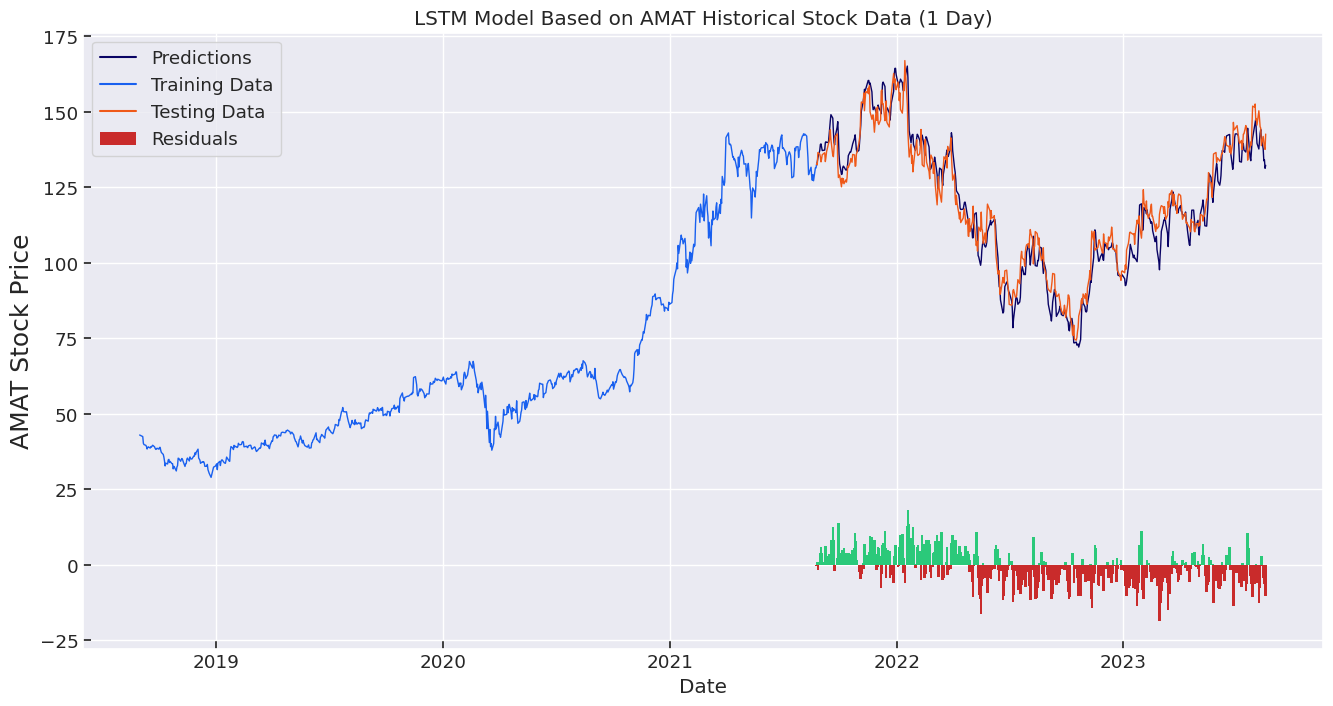

In [11]:
display_start_date = "2010-01-01"

train = pd.DataFrame(data_filtered_ext['Close'][:train_data_len + 1]).rename(columns={'Close': 'Training Data'})
valid = pd.DataFrame(data_filtered_ext['Close'][train_data_len:]).rename(columns={'Close': 'Testing Data'})
valid.insert(1, "Predictions", y_pred, True)
valid.insert(1, "Residuals", valid["Predictions"] - valid["Testing Data"], True)
df_union = pd.concat([train, valid])

print(df_union.index)

df_union_zoom = df_union[df_union.index > display_start_date]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("LSTM Model Based on AMAT Historical Stock Data (1 Day)")
plt.ylabel("AMAT Stock Price", fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['Predictions', 'Training Data', 'Testing Data']], linewidth=1.0, dashes=False, ax=ax1)

df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["Residuals"].dropna()]
ax1.bar(height=df_union_zoom['Residuals'].dropna(), x=df_union_zoom['Residuals'].dropna().index, width=4, label='Residuals', color=df_sub, edgecolor='none')
ax1.tick_params(which='both', direction='in', bottom=True, left=True)
ax1.spines['left'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
plt.legend()
plt.show()

DatetimeIndex(['2018-08-31', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14',
               ...
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18'],
              dtype='datetime64[ns]', name='Date', length=1250, freq=None)


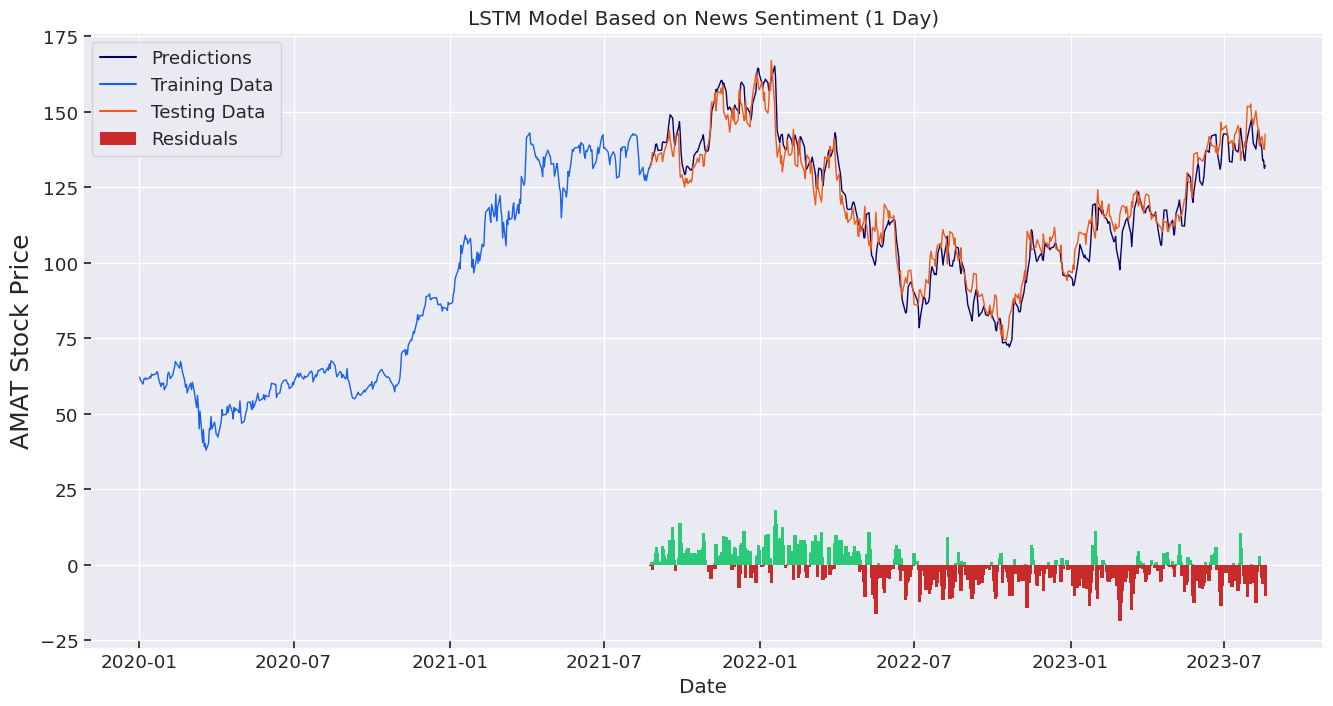

In [18]:
display_start_date = "2020-01-01"

train = pd.DataFrame(data_filtered_ext['Close'][:train_data_len + 1]).rename(columns={'Close': 'Training Data'})
valid = pd.DataFrame(data_filtered_ext['Close'][train_data_len:]).rename(columns={'Close': 'Testing Data'})
valid.insert(1, "Predictions", y_pred, True)
valid.insert(1, "Residuals", valid["Predictions"] - valid["Testing Data"], True)
df_union = pd.concat([train, valid])

print(df_union.index)

df_union_zoom = df_union[df_union.index > display_start_date]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("LSTM Model Based on News Sentiment (1 Day)")
plt.ylabel("AMAT Stock Price", fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['Predictions', 'Training Data', 'Testing Data']], linewidth=1.0, dashes=False, ax=ax1)

df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["Residuals"].dropna()]
ax1.bar(height=df_union_zoom['Residuals'].dropna(), x=df_union_zoom['Residuals'].dropna().index, width=4, label='Residuals', color=df_sub, edgecolor='none')
ax1.tick_params(which='both', direction='in', bottom=True, left=True)
ax1.spines['left'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
plt.legend()
plt.show()

DatetimeIndex(['2018-08-31', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14',
               ...
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18'],
              dtype='datetime64[ns]', name='Date', length=1250, freq=None)


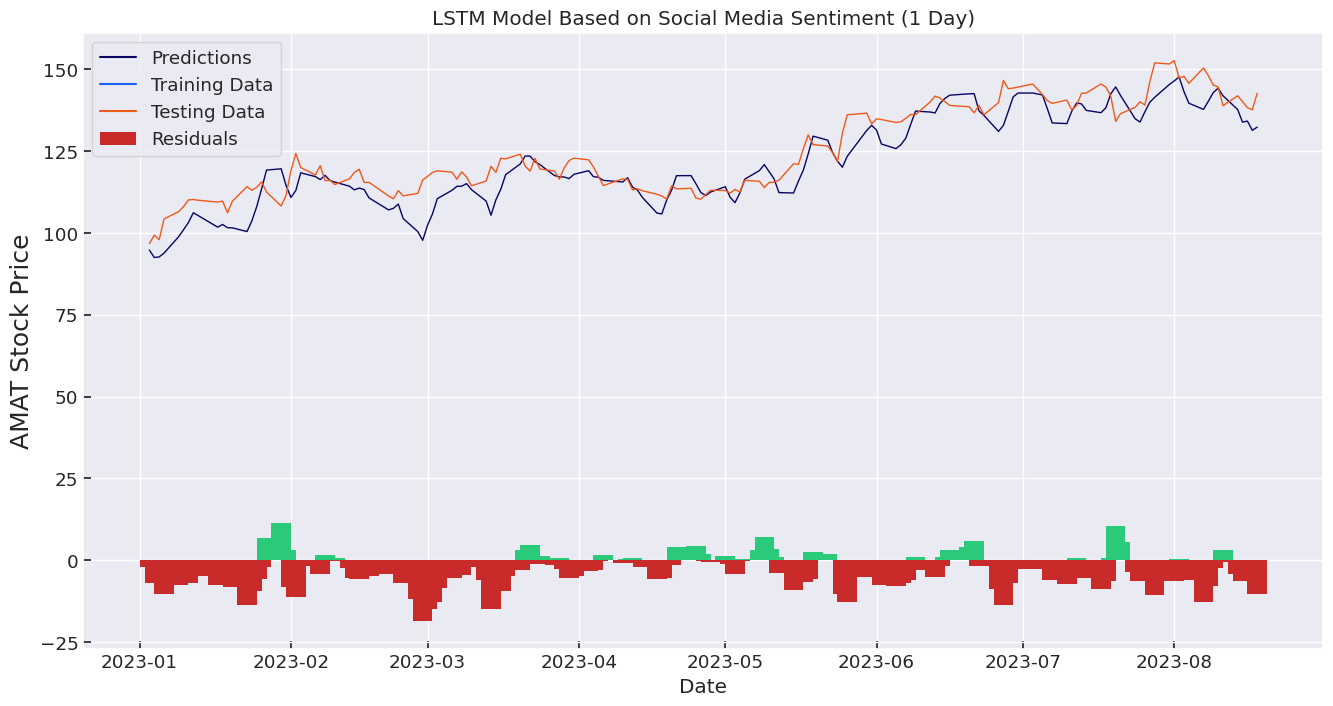

In [17]:
display_start_date = "2023-01-01"

train = pd.DataFrame(data_filtered_ext['Close'][:train_data_len + 1]).rename(columns={'Close': 'Training Data'})
valid = pd.DataFrame(data_filtered_ext['Close'][train_data_len:]).rename(columns={'Close': 'Testing Data'})
valid.insert(1, "Predictions", y_pred, True)
valid.insert(1, "Residuals", valid["Predictions"] - valid["Testing Data"], True)
df_union = pd.concat([train, valid])

print(df_union.index)

df_union_zoom = df_union[df_union.index > display_start_date]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("LSTM Model Based on Social Media Sentiment (1 Day)")
plt.ylabel("AMAT Stock Price", fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['Predictions', 'Training Data', 'Testing Data']], linewidth=1.0, dashes=False, ax=ax1)

df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union_zoom["Residuals"].dropna()]
ax1.bar(height=df_union_zoom['Residuals'].dropna(), x=df_union_zoom['Residuals'].dropna().index, width=4, label='Residuals', color=df_sub, edgecolor='none')
ax1.tick_params(which='both', direction='in', bottom=True, left=True)
ax1.spines['left'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
plt.legend()
plt.show()

In [14]:
df_temp = df[-sequence_length:]
new_df = df_temp.filter(FEATURES)

N = sequence_length

last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.transform(last_N_days)

X_test_new = []
X_test_new.append(last_N_days_scaled)

pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

price_today = np.round(new_df['Close'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''

print(f'The close price for {"AMAT"} at {str(dt.date.today())} was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')


1/1 [==============================] - 0s 33ms/step
The close price for AMAT at 2023-08-23 was 142.66
The predicted close price is 138.13999938964844 (-3.27%)


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# Inverse transform predictions
train_predict = scaler_pred.inverse_transform(train_predict)
y_train = scaler_pred.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler_pred.inverse_transform(test_predict)
y_test = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mae_train = mean_absolute_error(y_train, train_predict)
mse_train = mean_squared_error(y_train, train_predict)
rmse_train = np.sqrt(mse_train)

mae_test = mean_absolute_error(y_test, test_predict)
mse_test = mean_squared_error(y_test, test_predict)
rmse_test = np.sqrt(mse_test)

print(f'Training MAE: {mae_train:.4f}')
print(f'Training MSE: {mse_train:.4f}')
print(f'Training RMSE: {rmse_train:.4f}')
print(f'Testing MAE: {mae_test:.4f}')
print(f'Testing MSE: {mse_test:.4f}')
print(f'Testing RMSE: {rmse_test:.4f}')

def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(y_test, test_predict)
print(f'Mean Absolute Percentage Error: {mape:.4f}')

r2 = r2_score(y_test, test_predict)
print(f"R-squared (R2): {r2:.4f}")

0
0
16/16 [==============================] - 1s 36ms/step
Training MAE: 2.0037
Training MSE: 7.8292
Training RMSE: 2.7981
Testing MAE: 4.5590
Testing MSE: 33.0975
Testing RMSE: 5.7530
Mean Absolute Percentage Error: 3.8709
R-squared (R2): 0.9211
